In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from numpy.lib.shape_base import vsplit

In [ ]:
image = cv2.imread("assets/img2.png", cv2.IMREAD_GRAYSCALE) #Lire l'image en intensités de gris

image[:] = image[:]/2
# cv2.imwrite("img2.0.png")

imgNorm = np.zeros((image.shape), np.uint8) #Créer une image vide sur 8bits ayant la même taille que image
h, w = image.shape #récupérer la taille de l'image 'image' 

min = 255
max = 0

#Parcourir les pixels
for y in range(h):
    for x in range(w):
        if image[y,x] > max:
            max = image[y,x] #Récupérer la valeur de pixel la plus élevée
        if image[y,x] < min:
            min = image[y,x] #Récupérer la valeur de pixel minimum
            
print(f'min : {min}   max :{max}')


for y in range(h):
    for x in range(w):
        imgNorm[y,x] = (image[y,x]-min)*255/(max-min) #Normaliser l'image sur l'ntervale de [0, 255]

cv2.imshow('Image source', image)
cv2.imshow('Image normalisee', imgNorm)
cv2.waitKey(0)  # Attendre une touche pour fermer la fenêtre
cv2.destroyAllWindows()

min : 0   max :127


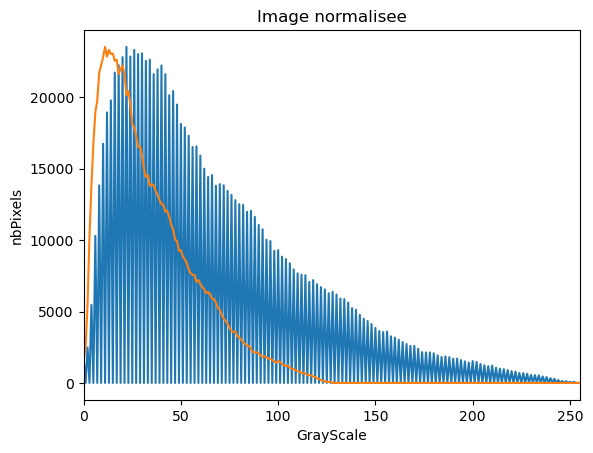

In [16]:
hist1 = np.zeros((256,1), np.uint16) # Tableau de 256 lignes et 1 colonne, pour stocker l'histogramme de l'image originale. 
                                     # Chaque ligne correspond à une intensité de gris (de 0 à 255).
for y in range(h):
    for x in range(w):
        hist1[image[y,x], 0] += 1 # Pour chaque pixel, l'intensité est utilisée comme index pour incrémenter la valeur dans l'histogramme 'hist1'. 
                                  #Chaque index représente le nombre de pixels ayant cette intensité.

hist2 = cv2.calcHist([imgNorm], [0], None, [256], [0,255])  # calcule l'histogramme de l'image 'imgNorm' (image normalisée). 
                                                            # Le paramètre [0] indique que nous travaillons sur le premier et unique canal (gris) 
                                                            # et [256] spécifie le nombre de niveaux d'intensité (de 0 à 255).

plt.figure()
plt.title('Image normalisee')  
plt.xlabel('GrayScale')  # L'axe X représente les niveaux de gris (intensités de 0 à 255)
plt.ylabel('nbPixels')  # L'axe Y représente le nombre de pixels ayant une intensité donnée

# Traçage des deux histogrammes
plt.plot(hist2)  
plt.plot(hist1)  
plt.xlim([0,255])  # Fixe les limites de l'axe X entre 0 et 255 (correspond aux niveaux de gris)
plt.show()
